In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
import tensorflow.keras as keras
import tensorflow.keras.models as models
import tensorflow.keras.optimizers as optimizers
import os 
import cv2
from tensorflow.keras import backend as K 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Activation ,Input



Kích thước của tập train: (60000, 28, 28) (60000,)
Kích thước của tập test (validation): (10000, 28, 28) (10000,)
Số lượng ảnh của mỗi chữ số trong tập train:
Số 0: 5923 ảnh
Số 1: 6742 ảnh
Số 2: 5958 ảnh
Số 3: 6131 ảnh
Số 4: 5842 ảnh
Số 5: 5421 ảnh
Số 6: 5918 ảnh
Số 7: 6265 ảnh
Số 8: 5851 ảnh
Số 9: 5949 ảnh

Số lượng ảnh của mỗi chữ số trong tập validation (test):
Số 0: 980 ảnh
Số 1: 1135 ảnh
Số 2: 1032 ảnh
Số 3: 1010 ảnh
Số 4: 982 ảnh
Số 5: 892 ảnh
Số 6: 958 ảnh
Số 7: 1028 ảnh
Số 8: 974 ảnh
Số 9: 1009 ảnh


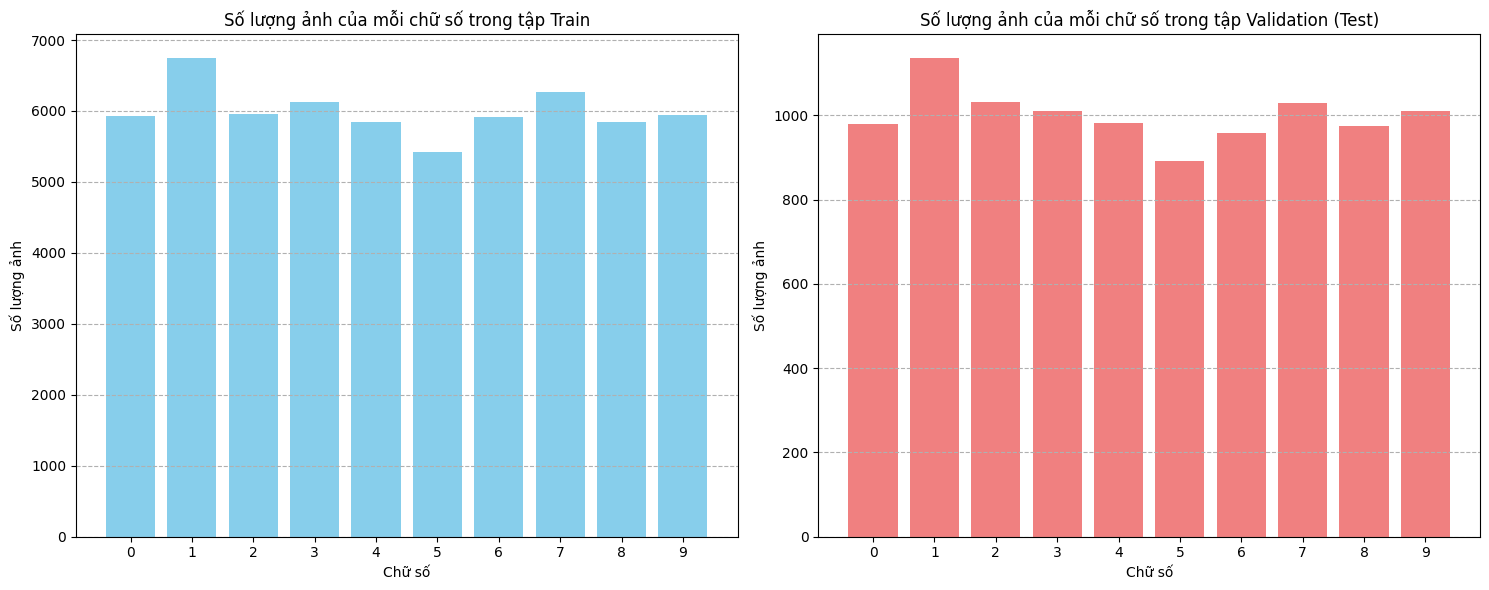

In [3]:
# 1.Tải bộ dữ liệu dataset 
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

print("Kích thước của tập train:", x_train.shape, y_train.shape)
print("Kích thước của tập test (validation):", x_test.shape, y_test.shape)

#2.Đếm số lượng ảnh của mỗi chữ số trong tập train
unique_train, counts_train = np.unique(y_train, return_counts=True)
train_counts = dict(zip(unique_train, counts_train))

# 3. Đếm số lượng ảnh của mỗi chữ số trong tập test (validation)
unique_test, counts_test = np.unique(y_test, return_counts=True)
test_counts = dict(zip(unique_test, counts_test))

print("Số lượng ảnh của mỗi chữ số trong tập train:")
for digit in sorted(train_counts.keys()):
    print(f"Số {digit}: {train_counts[digit]} ảnh")

print("\nSố lượng ảnh của mỗi chữ số trong tập validation (test):")
for digit in sorted(test_counts.keys()):
    print(f"Số {digit}: {test_counts[digit]} ảnh")

# 4. Tạo biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Biểu đồ cho tập train
axes[0].bar(unique_train, counts_train, color='skyblue')
axes[0].set_title('Số lượng ảnh của mỗi chữ số trong tập Train')
axes[0].set_xlabel('Chữ số')
axes[0].set_ylabel('Số lượng ảnh')
axes[0].set_xticks(unique_train)
axes[0].grid(axis='y', linestyle='--')

# Biểu đồ cho tập validation (test)
axes[1].bar(unique_test, counts_test, color='lightcoral')
axes[1].set_title('Số lượng ảnh của mỗi chữ số trong tập Validation (Test)')
axes[1].set_xlabel('Chữ số')
axes[1].set_ylabel('Số lượng ảnh')
axes[1].set_xticks(unique_test)
axes[1].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()


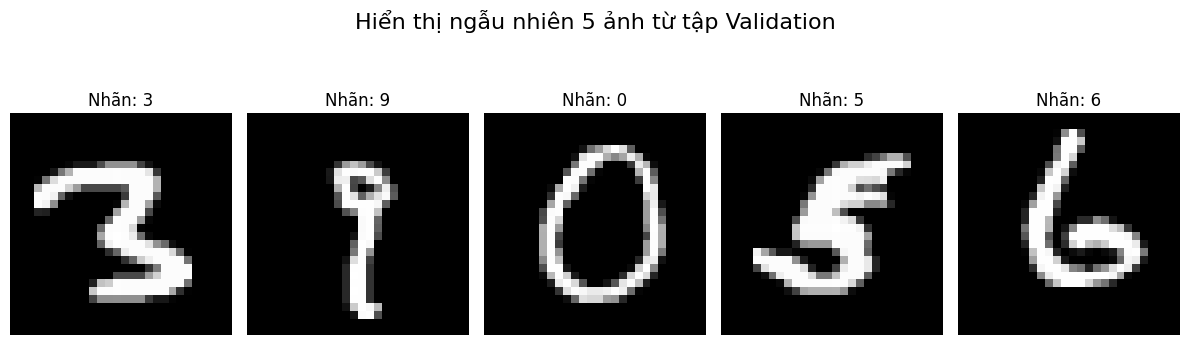

In [4]:
def plot_random_validation_images(x_test, y_test, num_images=5):
    """
    Hiển thị ngẫu nhiên num_images ảnh từ tập validation (x_test)
    cùng với nhãn tương ứng (y_test).

    Args:
        x_test (numpy.ndarray): Mảng chứa dữ liệu ảnh của tập validation.
        y_test (numpy.ndarray): Mảng chứa nhãn của tập validation.
        num_images (int): Số lượng ảnh muốn hiển thị ngẫu nhiên.
    """
    if num_images <= 0:
        print("Số lượng ảnh hiển thị phải lớn hơn 0.")
        return

    # Chọn ngẫu nhiên các chỉ mục
    random_indices = np.random.choice(len(x_test), num_images, replace=False)

    plt.figure(figsize=(12, 4))
    plt.suptitle(f'Hiển thị ngẫu nhiên {num_images} ảnh từ tập Validation', fontsize=16)

    for i, idx in enumerate(random_indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(x_test[idx], cmap='gray')  # Hiển thị ảnh ở dạng thang độ xám
        plt.title(f'Nhãn: {y_test[idx]}')
        plt.axis('off')  # Tắt trục tọa độ

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Điều chỉnh layout để không chồng lấn tiêu đề
    plt.show()

# Gọi hàm để hiển thị 5 ảnh ngẫu nhiên
plot_random_validation_images(x_test, y_test, num_images=5)

In [ ]:
# Xây dựng mô hình CNN để phân loại chữ số viết tay từ bộ dữ liệu MNIST
# Sử dụng x_test , y_test để làm tập validation


# Khởi tạo model tối ưu
model = Sequential()

# Lớp đầu vào
model.add(Input(shape=(28, 28, 1)))

# Khối Conv2D thứ nhất
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))  # 28x28 -> 14x14

# Khối Conv2D thứ hai  
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))  # 14x14 -> 7x7

# Khối Conv2D thứ ba 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))  # Giữ nguyên 7x7

# Flatten để chuyển sang fully connected layers
model.add(Flatten())

# Fully connected layers với Dropout để tránh overfitting
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Giảm dropout rate

# Lớp đầu ra
model.add(Dense(10, activation='softmax'))

# Hiển thị cấu trúc model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 458,570 (1.75 MB)

 Trainable params: 458,570 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# chuẩn hóa dữ liệu
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0


In [7]:
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [8]:
# Thêm một hàm tối ưu cho model
model.compile(optimizer='adam',           #adam : tự động điều chỉnh learning rate giúp traning hiệu quả hơn
              loss='sparse_categorical_crossentropy', # dùng  sparse_categorical_crossentropy cho bài toán nên ko cần chuyển về dạng ond-hot 
              metrics=['accuracy'])
# Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
# Lưu mô hình vào file model.h5
model.save("model.h5")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 31ms/step - accuracy: 0.8975 - loss: 0.3207 - val_accuracy: 0.9858 - val_loss: 0.0459
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9839 - loss: 0.0543 - val_accuracy: 0.9907 - val_loss: 0.0296
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9886 - loss: 0.0377 - val_accuracy: 0.9911 - val_loss: 0.0289
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9912 - loss: 0.0266 - val_accuracy: 0.9930 - val_loss: 0.0235
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9929 - loss: 0.0224 - val_accuracy: 0.9919 - val_loss: 0.0247
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9943 - loss: 0.0182 - val_accuracy: 0.9925 - val_loss: 0.0264
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9955 - loss: 0.0151 - val_accuracy: 0.9933 - val_loss: 0.0288
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 21ms/step - accuracy: 0.9957 -

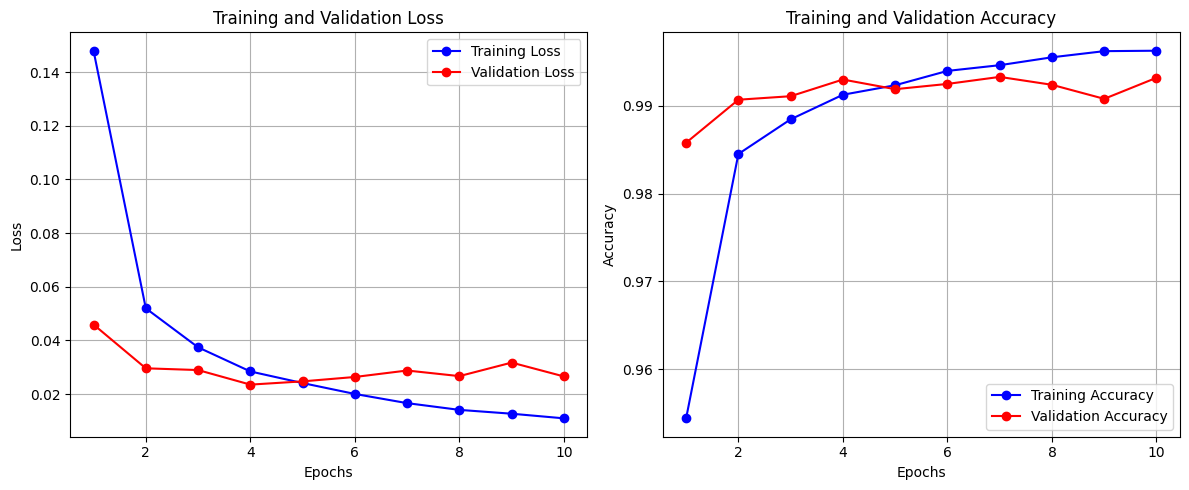

In [9]:
# --- Bắt đầu phần vẽ biểu đồ Loss và Accuracy ---

# Trích xuất dữ liệu từ history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1) # Tạo danh sách các epoch

# Vẽ biểu đồ Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 hàng, 2 cột, biểu đồ thứ nhất
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Vẽ biểu đồ Accuracy
plt.subplot(1, 2, 2) # 1 hàng, 2 cột, biểu đồ thứ hai
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout() # Đảm bảo các biểu đồ không chồng lấn
plt.show()

In [10]:
import seaborn as sns # Import seaborn để vẽ ma trận nhầm lẫn đẹp hơn
from sklearn.metrics import confusion_matrix


Đang tạo Ma trận nhầm lẫn...


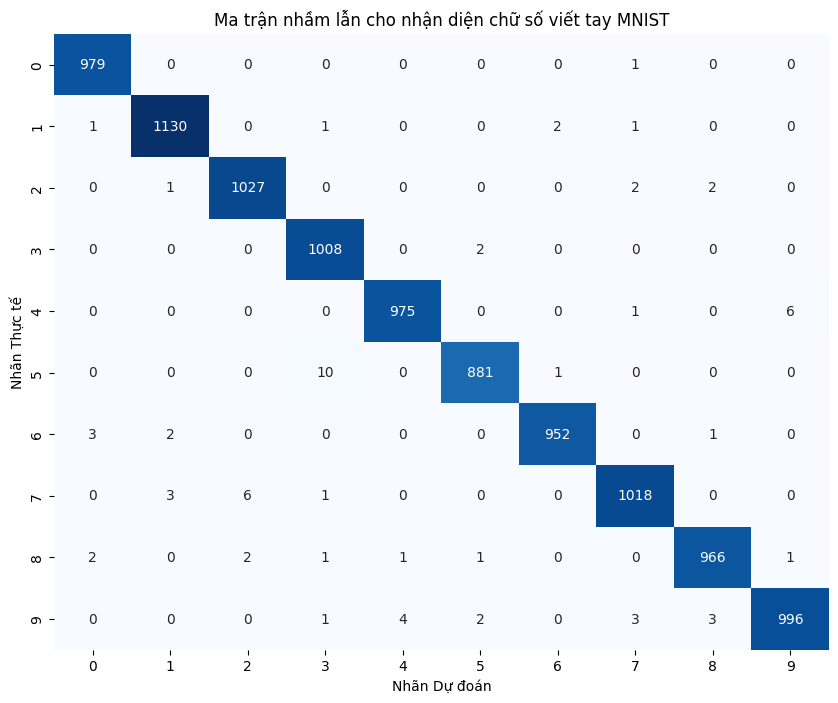

Hoàn thành vẽ Ma trận nhầm lẫn.


In [16]:


# --- Bắt đầu phần vẽ Ma trận nhầm lẫn ---
print("\nĐang tạo Ma trận nhầm lẫn...")

# 1. Dự đoán trên tập kiểm tra

y_pred = np.argmax(y_pred_proba, axis=1) # Lấy nhãn dự đoán có xác suất cao nhất

# 2. Tạo Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred) # y_test là nhãn thực tế

# 3. Vẽ Ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=range(10), yticklabels=range(10)) # range(10) cho 10 chữ số 0-9
plt.xlabel('Nhãn Dự đoán')
plt.ylabel('Nhãn Thực tế')
plt.title('Ma trận nhầm lẫn cho nhận diện chữ số viết tay MNIST')
plt.show()

print("Hoàn thành vẽ Ma trận nhầm lẫn.")

In [12]:
from sklearn.metrics import  classification_report
# --- Bắt đầu phần tạo Bảng tổng hợp Metrics chi tiết cho từng lớp ---
print("\n--- Bảng kết quả đánh giá hiệu suất của mô hình ---")
report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)])
print(report)

print("\nHoàn thành.")


--- Bảng kết quả đánh giá hiệu suất của mô hình ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


Hoàn thành.
